In [1]:
# ##############  THE HEIST  ##############
#          _....._
#         ';-.--';'
#          }===={       _.---.._
#        .'  _|_ '.    ';-..--';
#       /:: (_|_`  \    `}===={
#      |::  ,_|_)   |  .:  _|_ '.
#      \::.   |     /_;:_ (_|_`  \
#       '::_     _-;'--.-';_|_)   |
#           `````  }====={  |     /
#                .'  _|_  '.   _.'
#               /:: (_|_`   \``
#              |::  ,_|_)    |
#              \::.   |      /
#               '::_      _.'
#                   ``````  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import check_solution

In [3]:
def robber_algorithm_greedy(df):

    """
    This greedy approach calculate the money/time ratio to 
    determine the next best banks. The total time include the 
    time required to rob the bank and the time to get to the 
    bank. Farthest banks with high value are also penalized.
    """

    bank_list = []
    SPEED = 30
    time_left = 24
    current_pos = [[0,0]]

    df = df.rename(columns={"x_coordinate": "x", 
                            "y_coordinate": "y", 
                            "time (hr)": "time"})

    coord = df[["x", "y"]].to_numpy()

    while time_left > 0:
        df["ed"] = euclidean_distances(current_pos, coord)[0]
        # magic number 3 is a weight to penalize farthest banks
        df["gain"] = df.money / (df.ed / SPEED * 3 + df.time)
        idx = df.gain.idxmax()
        if time_left >= (df.ed[idx] / SPEED + df.time[idx]):
            df.money[idx] = 0
            time_left -= (df.ed[idx] / SPEED + df.time[idx])
            bank_list.append(idx)
            current_pos = [[df.x[idx],df.y[idx]]]
        else:
            break
    
    bank_list.reverse()
    return bank_list

In [4]:
def verify(travel_list, df):
    plt.plot(df.x_coordinate[travel_list], df.y_coordinate[travel_list])
    print(f'{len(travel_list)} banks robbed for a total of {sum(df.money[travel_list])} dollars')

840 ms ± 30.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
233 banks robbed for a total of 14517900 dollars


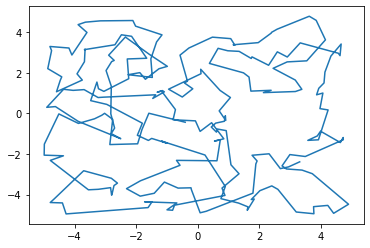

In [5]:
df = pd.read_csv('bank_data.csv')
%timeit robber_algorithm_greedy(df)
greedy_list = robber_algorithm_greedy(df)
verify(greedy_list, df)

In [6]:
df = pd.read_csv('bank_data.csv')
check_solution.check_solution(greedy_list, df)

Time Remaining: 0.11602332759511996


14517900.0

In [7]:
def robber_algorithm_heuristic(df):
    
    """
    This heuristic approach weeds out most banks with a poor 
    money/time ratio (it keeps only 3% of the banks) and then go 
    to the closest bank based on the euclidiean distance. This 
    method try to minimize the time spent traveling between banks.
    """

    bank_list = []
    SPEED = 30
    time_left = 24
    current_pos = [[0,0]]
    
    df = df.rename(columns={"x_coordinate": "x", 
                            "y_coordinate": "y", 
                            "time (hr)": "time"})
                            
    coord = df[["x", "y"]].to_numpy()
    
    while time_left > 0 and df.money.sum() > 0:
        df["ed"] = euclidean_distances(current_pos, coord)[0]
        # magic number 385000 come from trial and error
        # probably over optimizing for this specific dataset
        idx = df[df.money /df.time > 385000].ed.idxmin()
        if time_left >= (df.ed[idx] / SPEED + df.time[idx]):
            df.money[idx] = 0
            time_left -= (df.ed[idx] / SPEED + df.time[idx])
            bank_list.append(idx)
            current_pos = [[df.x[idx],df.y[idx]]]
        else:
            break
        
    bank_list.reverse()
    return bank_list

1.23 s ± 194 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
296 banks robbed for a total of 15216800 dollars


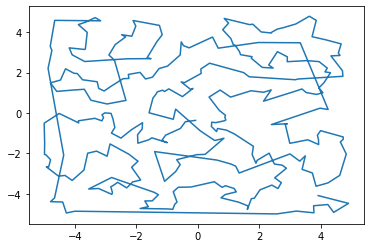

In [8]:
df = pd.read_csv('bank_data.csv')
%timeit  robber_algorithm_heuristic(df)
heuristic_list = robber_algorithm_heuristic(df)
verify(heuristic_list, df)

In [9]:
df = pd.read_csv('bank_data.csv')
check_solution.check_solution(heuristic_list, df)

Time Remaining: 0.11070497459296917


15216800.0